In [9]:
import pandas as pd

#Load Survey.csv dataset

survey_data = pd.read_csv('survey.csv')

survey_data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
survey_data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [11]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

The above dataset contains missing values on the features:
state; work_interfere and comments.

In addition we will have to see how the data has been submitted. At a first glance Gender shows that has more than 2 unique values. Moreover there are many Not a number (NaN) values that we will have to see if they are relevant or not. And we will see how to fix the data if possible or relevant.

Let's create a copy of the db

In [12]:
survey_data_ = survey_data.copy()

In [13]:
survey_data_ = survey_data_.drop_duplicates()
print(survey_data.duplicated().sum())

0


There are no duplicated rows!

In [14]:
missing_data = survey_data_.isnull()
print(missing_data.head(5))

missing_counts = survey_data_.isnull().sum()
print(missing_counts)

   Timestamp    Age  Gender  Country  state  self_employed  family_history  \
0      False  False   False    False  False           True           False   
1      False  False   False    False  False           True           False   
2      False  False   False    False   True           True           False   
3      False  False   False    False   True           True           False   
4      False  False   False    False  False           True           False   

   treatment  work_interfere  no_employees  ...  leave  \
0      False           False         False  ...  False   
1      False           False         False  ...  False   
2      False           False         False  ...  False   
3      False           False         False  ...  False   
4      False           False         False  ...  False   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                      False                    False      False       False   
1                     

We will proceed to review and fix values within the tables. State values that are NaN correspond to Countries which are not US. Therefore we will allow the Nan

In [15]:
survey_data_['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Let's clean the Gender columnn

In [16]:
#We are creating a function to re arrange the data

def clean_gender(gender):
    gender = gender.strip().lower()

    if gender in ['male', 'm', 'male ', 'cis male', 'cis man', 'guy (-ish) ^_^', 'man', 'mal', 'msle', 'mail', 'malr', 'make', 'maile']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'femake', 'female ', 'cis female', 'cis-female/femme', 'female (cis)', 'femail']:
        return 'Female'
    elif gender in ['non-binary', 'enby', 'androgyne', 'genderqueer', 'agender', 'fluid', 'male leaning androgynous', 'something kinda male?', 'queer/she/they', 'queer']:
        return 'Non-Binary'
    elif gender in ['trans-female', 'trans woman', 'female (trans)']:
        return 'Trans Female'
    elif gender in ['nah', 'all', 'a little about you', 'ostensibly male, unsure what that really means', 'neuter', 'p']:
        return 'Other'
    else:
        return 'Other'

survey_data_['Gender'] = survey_data_['Gender'].apply(clean_gender) #We apply changed by calling the function

In [17]:
survey_data_['Gender'].unique()

array(['Female', 'Male', 'Other', 'Trans Female', 'Non-Binary'],
      dtype=object)

We need to encode the qualitative data into quant data

In [18]:
survey_data_['Encoded_Gender'] = survey_data_['Gender'].map({'Male': 0, 'Female': 1, 'Non-Binary': 2, 'Trans Female': 3, 'Other': 4})

In [19]:
survey_data_.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Encoded_Gender
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,0
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,0
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,1
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Maybe,No,Some of them,No,No,No,Don't know,No,NaN,0


Lets see Age

In [20]:
survey_data_['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Age shows many incoherent values. lets take them out

In [21]:
invalid_ages = survey_data_[(survey_data_['Age'] < 8) | (survey_data_['Age'] > 120)].index
survey_data_ = survey_data_.drop(invalid_ages)

In [22]:
survey_data_['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61,  8, 11, 72])

Lets dive into seeing Countries

In [23]:
survey_data_['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

Lets dive into State

In [24]:
survey_data_['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [25]:
survey_data_['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [26]:
self_employed_nan = survey_data_.loc[survey_data_['self_employed'].isna()]
count_self_employed_nan = survey_data_['self_employed'].isna().sum()
print(count_self_employed_nan)

18


We will proceed to drop the amount of NaN in the column Self_Employed since the amount is aprox 1% of the sample which is not significant

In [27]:
survey_data_ = survey_data_.drop(self_employed_nan.index)

In [28]:
survey_data_['self_employed'].unique()

array(['Yes', 'No'], dtype=object)

Lets encode the Yes/No from self emplyed

In [29]:
survey_data_['Encoded_Self_Employed'] = survey_data_['self_employed'].map({'Yes': 1, 'No': 0})
survey_data_.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Encoded_Gender,Encoded_Self_Employed
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,No,Some of them,Some of them,No,No,Don't know,No,NaN,0,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,Some of them,Yes,No,No,Yes,No,NaN,0,0
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,No,No,No,No,No,No,NaN,0,0
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,No,No,No,No,No,No,No,NaN,1,0
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,No,Some of them,No,No,No,Don't know,No,NaN,0,0


In [30]:
survey_data_['family_history'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
survey_data_['treatment'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
survey_data_['work_interfere'].unique()


array(['Sometimes', nan, 'Never', 'Often', 'Rarely'], dtype=object)

In [33]:
count_work_interference_nan = survey_data_['work_interfere'].isna().sum()
print(count_work_interference_nan)

262


We will drop the NaNs from the work interfere column and then we will encode the qualitative using a map

In [34]:
work_interfere_nan = survey_data_.loc[survey_data_['work_interfere'].isna()].index

survey_data_ = survey_data_.drop(work_interfere_nan)

survey_data_['Encoded_Work_Interfere'] = survey_data_['work_interfere'].map({'Sometimes': 3, 'Never': 1, 'Often': 4, 'Rarely': 2 })

survey_data_.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Encoded_Gender,Encoded_Self_Employed,Encoded_Work_Interfere
18,2014-08-27 11:34:53,46,Male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Yes,Yes,No,Yes,Yes,Yes,NaN,0,1,3
20,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,Some of them,Some of them,No,No,No,No,NaN,0,0,3
21,2014-08-27 11:35:24,31,Male,United States,NC,Yes,No,No,Never,1-5,...,Some of them,Some of them,No,Maybe,Yes,No,NaN,0,1,1
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Some of them,Yes,No,Maybe,No,No,NaN,0,0,4
23,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,No,No,No,Yes,Don't know,No,NaN,0,0,1


In [35]:
survey_data_['no_employees'].unique()


array(['1-5', '100-500', '26-100', 'More than 1000', '6-25', '500-1000'],
      dtype=object)

In [36]:
survey_data_['coworkers'].unique()


array(['Yes', 'Some of them', 'No'], dtype=object)

In [37]:
survey_data_['supervisor'].unique()


array(['Yes', 'Some of them', 'No'], dtype=object)

In [38]:

survey_data_['mental_health_interview'].unique()


array(['No', 'Maybe', 'Yes'], dtype=object)

In [39]:
survey_data_['mental_vs_physical'].unique()


array(['Yes', 'No', "Don't know"], dtype=object)

In [40]:

survey_data_['obs_consequence'].unique()



array(['Yes', 'No'], dtype=object)

In [41]:
survey_data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 18 to 1258
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  973 non-null    object
 1   Age                        973 non-null    int64 
 2   Gender                     973 non-null    object
 3   Country                    973 non-null    object
 4   state                      589 non-null    object
 5   self_employed              973 non-null    object
 6   family_history             973 non-null    object
 7   treatment                  973 non-null    object
 8   work_interfere             973 non-null    object
 9   no_employees               973 non-null    object
 10  remote_work                973 non-null    object
 11  tech_company               973 non-null    object
 12  benefits                   973 non-null    object
 13  care_options               973 non-null    object
 14  wellness_prog

The NaN values in state are related to country. Therefore I will eventually create a 2 dataframes. 1) US,
3) Rest of the world

In [56]:
survey_data_['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

The above feature will indicate that once we encode the data, we will be able to soee which workers present mental health consequences

In [57]:
survey_data_['Encoded_Mental_Health_Consequence'] = survey_data_['mental_health_consequence'].map({'Yes': 1, 'No': 0, 'Maybe': 2})

In [58]:
surevey_data_us = survey_data_.loc[survey_data_['Country'] == 'United States']
survey_data_rest = survey_data_.loc[survey_data_['Country'] != 'United States']

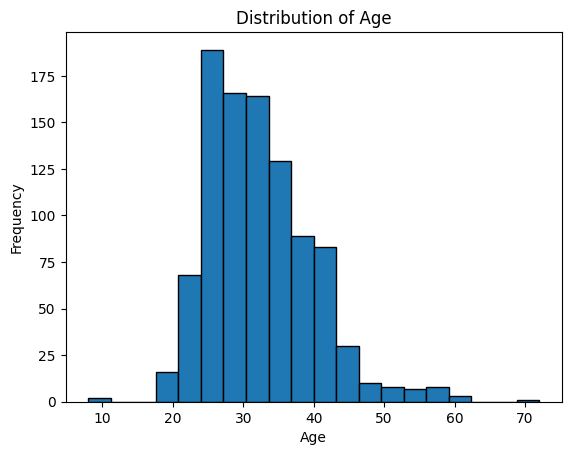

In [59]:
import matplotlib.pyplot as plt

plt.hist(survey_data_['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Lets normalize to take out outliers

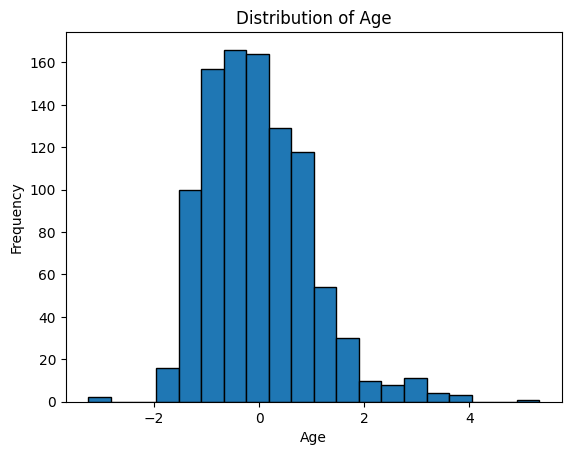

,Age,Encoded_Gender,Encoded_Self_Employed,Encoded_Work_Interfere,Age_Normalized,Encoded_Mental_Health_Consequence,Normalized_Age
count,973.000000,973.000000,973.000000,973.000000,9.730000e+02,973.000000,9.730000e+02
mean,32.260021,0.263104,0.126413,2.542652,-2.044727e-16,1.032888,-2.044727e-16
std,7.461369,0.546825,0.332485,0.979985,1.000514e+00,0.858837,1.000514e+00
min,8.000000,0.000000,0.000000,1.000000,-3.253089e+00,0.000000,-3.253089e+00
25%,27.000000,0.000000,0.000000,2.000000,-7.053297e-01,0.000000,-7.053297e-01
50%,31.000000,0.000000,0.000000,3.000000,-1.689594e-01,1.000000,-1.689594e-01
75%,36.000000,0.000000,0.000000,3.000000,5.015035e-01,2.000000,5.015035e-01
max,72.000000,4.000000,1.000000,4.000000,5.328836e+00,2.000000,5.328836e+00


In [65]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
survey_data_['Normalized_Age'] = scaler.fit_transform(survey_data_[['Age']])



plt.hist(survey_data_['Normalized_Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

survey_data_.describe()

In [66]:
survey_data_.pop('Age_Normalized') #Delete column

,Age_Normalized
18,1.842429
20,-0.437145
21,-0.168959
22,1.842429
23,1.171966
...,...
1252,-0.437145
1253,0.501503
1255,-0.034867
1256,0.233318


The frequency distribution shows that the report sees a slight skewness. Therefore we can conclude that younger people report to have mental health issues.

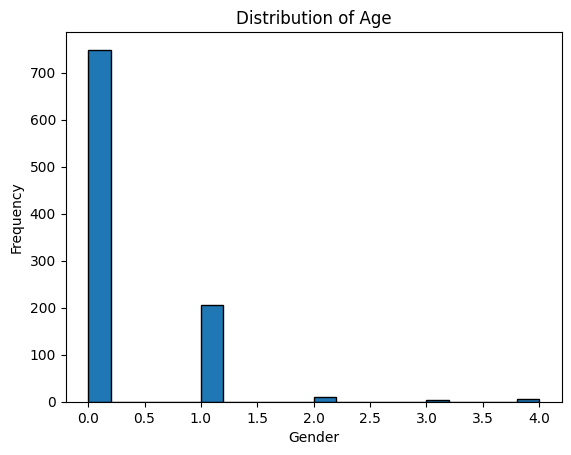

In [68]:
plt.hist(survey_data_['Encoded_Gender'], bins=20, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()



According to the distribution of age, Males present to be more lenient to report mental health issues

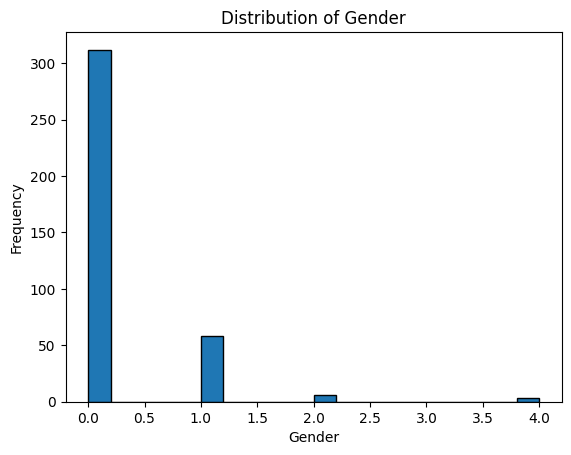

In [71]:
plt.hist(survey_data_rest['Encoded_Gender'], bins=20, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Shows distribution by gender for Rest of the World

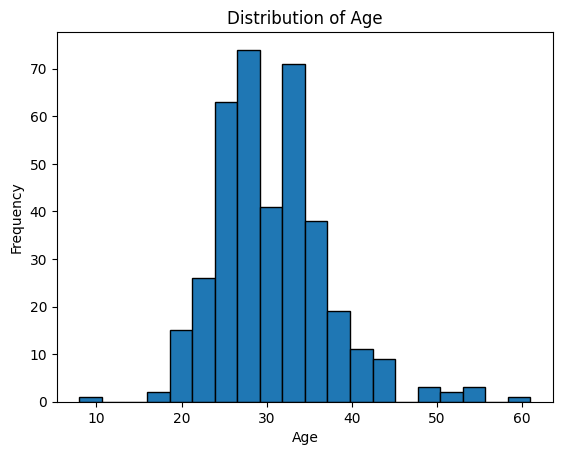

In [78]:
plt.hist(survey_data_rest['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The db shows that most reported mental health issues were between ages 22 to 28 and from 32 to 33

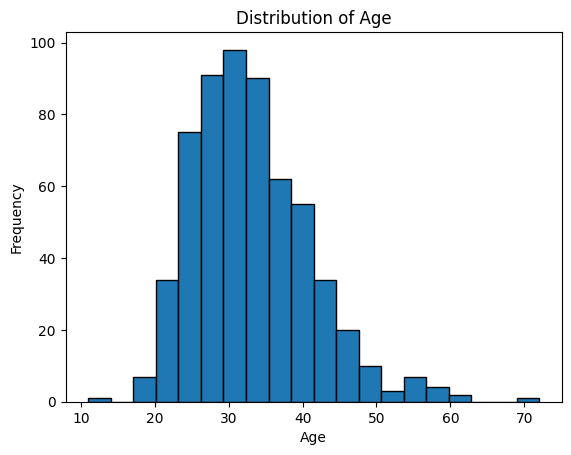

In [79]:

plt.hist(surevey_data_us['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

For the US workers it shows between mid 20s to mid 30s. In the contrary as Rest of the world.